In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле scipy.stats.

Сгенерируйте примеры из распределения

In [28]:

# ваш код тут
# например вот такое распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine
gennorm_rv = sts.gennorm(5,4)
sample = gennorm_rv.rvs(100)
sample[:10]


array([2.95057054, 3.22080215, 3.56416005, 4.48701252, 5.14968946,
       3.85801958, 3.32586486, 3.80180345, 4.60973255, 4.56826007])

In [29]:
real_mean = gennorm_rv.mean() # настоящее среднее случайной величины
real_mean

4.0

In [30]:
real_var = gennorm_rv.var() # настоящее среднее случайной величины
real_var

0.3243831291665643

Постройте гистограмму выборки и теоретическую плотность распределения


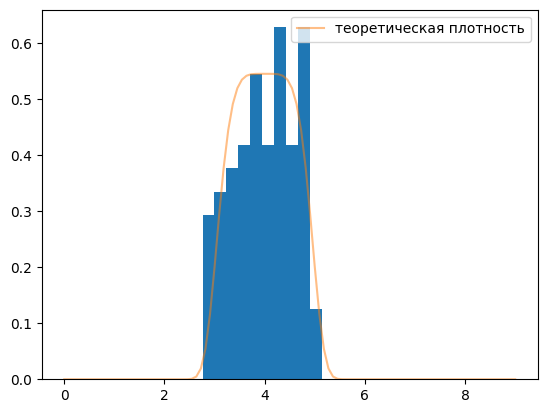

In [33]:
plt.hist(sample, density=True)
x = np.linspace(0,9,100)
pdf = gennorm_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [34]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

3.984583820034351
0.3567655844681741



Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

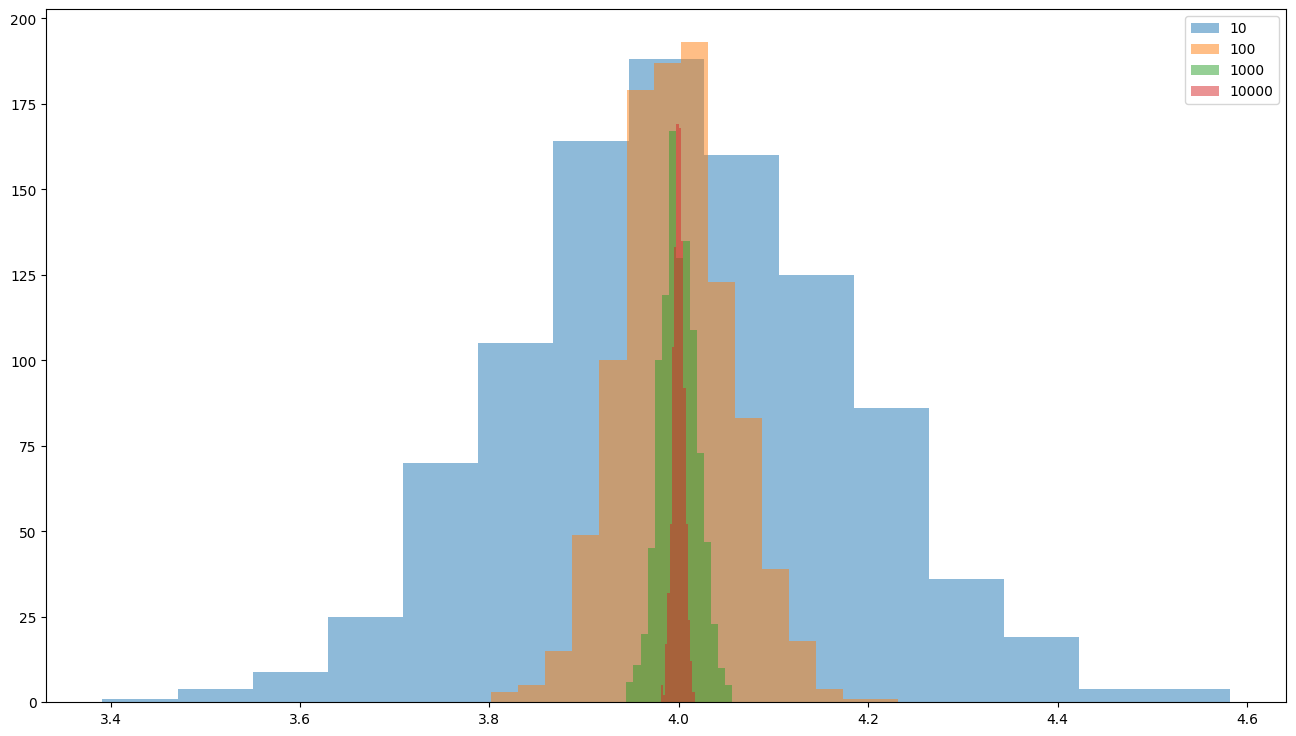

In [42]:
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 100, 1000, 10000]:
    means = []
    for i in range(1000):
         means.append(np.mean(gennorm_rv.rvs(N)))
    plt.hist(means, alpha=0.5, bins=15)

plt.legend(['10', '100', '1000', '10000'])
plt.show()

In [52]:

print(f'mean: {gennorm_rv.mean()}')
print(f'var:  {gennorm_rv.var().round(5)}')
print(f'std:  {gennorm_rv.std().round(5)}')

mean: 4.0
var:  0.32438
std:  0.56955


[]

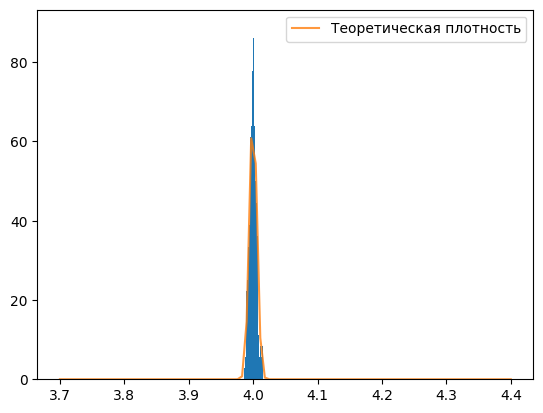

In [59]:
norm_rv = sts.norm(loc=gennorm_rv.mean(), scale=gennorm_rv.std()/ np.sqrt(N))
plt.hist(means, density=True, bins=100)
x = np.linspace(3.7,4.4, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.8)
plt.legend()
plt.plot()